In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("covidstats0.csv")

In [3]:
df.columns

Index(['Date', 'Cases Rate - Total', 'Deaths Rate - Total',
       'Hospitalizations Rate - Total', 'Cases Rate - Age 0-17',
       'Cases Rate - Age 18-29', 'Cases Rate - Age 30-39',
       'Cases Rate - Age 40-49', 'Cases Rate - Age 50-59',
       'Cases Rate - Age 60-69', 'Cases Rate - Age 70-79',
       'Cases Rate -  Age 80+', 'Cases Rate - Female', 'Cases Rate - Male',
       'Cases Rate - Latinx', 'Cases Rate - Asian Non-Latinx',
       'Cases Rate - Black Non-Latinx', 'Cases Rate - White Non-Latinx',
       'Cases Rate - Other Race Non-Latinx', 'Deaths Rate - Age 0-17',
       'Deaths Rate - Age 18-29', 'Deaths Rate - Age 30-39',
       'Deaths Rate - Age 40-49', 'Deaths Rate - Age 50-59',
       'Deaths Rate - Age 60-69', 'Deaths Rate - Age 70-79',
       'Deaths Rate - Age 80+', 'Deaths Rate - Female', 'Deaths Rate - Male',
       'Deaths Rate - Latinx', 'Deaths Rate - Asian Non-Latinx',
       'Deaths Rate - Black Non-Latinx', 'Deaths Rate - White Non-Latinx',
       'Deaths

In [4]:
df.rename(columns={
    "Hospitalizations Rate -  Latinx": "Hospitalizations Rate - Latinx", 
    "Hospitalizations Rate -  Asian Non-Latinx": "Hospitalizations Rate - Asian Non-Latinx",
    "Hospitalizations Rate -  Black Non-Latinx": "Hospitalizations Rate - Black Non-Latinx",
    "Hospitalizations Rate -  White Non-Latinx": "Hospitalizations Rate - White Non-Latinx",
    "Hospitalizations Rate -  Other Race Non-Latinx": "Hospitalizations Rate - Other Race Non-Latinx"
}, inplace=True)

# How do COVID-19 deaths, cases, and hospitalizations compare across race in Chicago ?

Create table that has deaths, cases, and hospitalizations rates as columns and race (Latinx, Asian, Black, White, Other) as rows. Determine each rate by taking the average of all the rates from the yearly data that we have (each row in the original dataframe is a day from 2020-2021)

In [10]:
cats = ["Deaths", "Hospitalizations", "Cases"]
races = ["Latinx", "Asian Non-Latinx", "Black Non-Latinx", "White Non-Latinx", "Other Race Non-Latinx"]
data = {}
for cat in cats:
    data[cat] = []
    for race in races:
        data[cat].append(df[f"{cat} Rate - {race}"].mean())
    
df2 = pd.DataFrame(data=data, columns=cats, index=["Latinx", "Asian", "Black", "White", "Other"])

In [14]:
df2.sort_values("Deaths", ascending=False)

,Deaths,Hospitalizations,Cases
Black,0.696286,2.692286,15.262571
Latinx,0.608857,1.809429,31.263429
Asian,0.366857,0.858286,9.869143
White,0.340286,0.948571,14.257143
Other,0.102286,1.282000,26.222857


As we can see from the extrapolated data above, the historically underprivileged Latinx and Black populations in Chicago had a much higher death, hospitalization, and COVID-19 cases rates than Asian, White, and Other Non-Latinx groups, sometimes doubling or tripling the rate in some metrics (e.g cases)

<AxesSubplot:title={'center':'COVID-19 Deaths(Rate) in Chicago by Race'}, xlabel='Race', ylabel='%'>

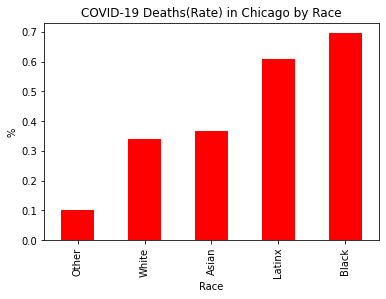

In [37]:
df2.sort_values("Deaths")["Deaths"].plot(kind="bar", title="COVID-19 Deaths(Rate) in Chicago by Race", xlabel="Race", ylabel="%", color="red")

<AxesSubplot:title={'center':'COVID-19 Hospitalization (Rate) in Chicago by Race'}, xlabel='Race', ylabel='%'>

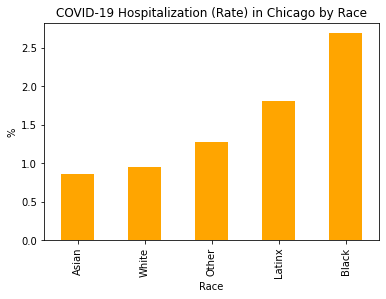

In [38]:
df2.sort_values("Hospitalizations")["Hospitalizations"].plot(kind="bar", title="COVID-19 Hospitalization (Rate) in Chicago by Race", xlabel="Race", ylabel="%", color="orange")

<AxesSubplot:title={'center':'COVID-19 Case (Rate) in Chicago by Race'}>

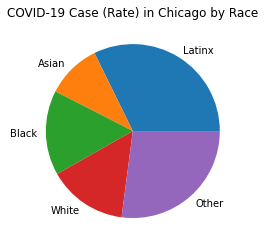

In [30]:
df2["Cases"].plot(kind="pie", title="COVID-19 Case (Rate) in Chicago by Race", ylabel="")

### The Latinx and Black communities of Chicago have greater COVID-19 death, hospitalization, and case rates than White, Asian, and Other Non-Latinx populations.

# How do cases and deaths compare across zip codes according to median income ?

E.g do zip codes with higher median incomes have less cases and deaths ?

In [208]:
zcmi = pd.read_csv("zcmi.csv") #zip code median income for Chicago
zcmi["Median Income"].replace("\$", "", regex=True, inplace=True)
zcmi["Median Income"].replace("\,", "", regex=True, inplace=True)
zcmi["Median Income"] = pd.to_numeric(zcmi["Median Income"])
zcmi.set_index("Zip", inplace=True)
#above we convert all the zip code and median income values to numeric values from objects

In [209]:
zcdf = pd.read_csv("zcdf.csv", thousands=",").dropna() #zip code data frame (cases, tests, and deaths by zip code)
zcdf.rename(columns={"ZIP Code": "Zip"}, inplace=True)
zcdf["Zip"] = pd.to_numeric(zcdf["Zip"]) #if we ever have a series whose dtype is an object, we need to convert that series to some numeric value

In [210]:
zcdf

,Zip,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
10,60603,20,05/10/2020,05/16/2020,1.0,5.0,85.0,425.9,8.0,50,...,4258.9,0.4,0.2,0,0,0.0,0.0,1174,60603-2020-20,POINT (-87.625473 41.880112)
11,60603,21,05/17/2020,05/23/2020,1.0,6.0,85.0,511.1,14.0,64,...,5451.4,0.1,0.2,0,0,0.0,0.0,1174,60603-2020-21,POINT (-87.625473 41.880112)
12,60603,22,05/24/2020,05/30/2020,0.0,6.0,0.0,511.1,7.0,71,...,6047.7,0.0,0.2,0,0,0.0,0.0,1174,60603-2020-22,POINT (-87.625473 41.880112)
13,60603,23,05/31/2020,06/06/2020,0.0,6.0,0.0,511.1,19.0,90,...,7666.1,0.1,0.1,0,0,0.0,0.0,1174,60603-2020-23,POINT (-87.625473 41.880112)
14,60603,24,06/07/2020,06/13/2020,0.0,6.0,0.0,511.1,10.0,100,...,8517.9,0.0,0.1,0,0,0.0,0.0,1174,60603-2020-24,POINT (-87.625473 41.880112)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,60610,26,06/21/2020,06/27/2020,26.0,299.0,67.0,766.3,645.0,4243,...,10874.2,0.0,0.1,0,9,0.0,23.1,39019,60610-2020-26,POINT (-87.63581 41.90455)
3115,60620,22,05/24/2020,05/30/2020,53.0,1066.0,78.0,1565.4,892.0,6317,...,9276.6,0.1,0.2,1,66,1.5,96.9,68096,60620-2020-22,POINT (-87.651656 41.740873)
3117,60621,16,04/12/2020,04/18/2020,76.0,219.0,262.0,754.1,168.0,585,...,2014.3,0.4,0.4,3,9,10.3,31.0,29042,60621-2020-16,POINT (-87.638812 41.776931)
3118,60630,35,08/23/2020,08/29/2020,51.0,1162.0,89.0,2026.4,991.0,14523,...,25326.1,0.1,0.1,1,63,1.7,109.9,57344,60630-2020-35,POINT (-87.759611 41.971261)


For each zip code in our zip code median income data frame, we need to sum up the weekly cumulative totals for the past 52 weeks for cases and deaths within that zip code. Thus, our new df will be
zip code, median income, deaths, cases

In [224]:
data = []
for zipcode in list(zcmi.index):
    mi = zcmi.loc[zipcode]["Median Income"]    
    cases = zcdf[zcdf["Zip"] == zipcode]["Cases - Weekly"].sum()
    deaths = zcdf[zcdf["Zip"] == zipcode]["Deaths - Weekly"].sum()
    data.append([mi, cases, deaths])

In [246]:
df3 = pd.DataFrame(data=data, columns=["Median Income", "Cases", "Deaths"])
df3.set_index("Median Income", inplace=True)
df3

,Cases,Deaths
Median Income,,
100377.0,263.0,3
77374.0,903.0,11
69889.0,1934.0,14
68324.0,4786.0,89
61815.0,64.0,0
59849.0,3137.0,33
58232.0,2375.0,66
56151.0,1678.0,11
55647.0,4482.0,46


Now we need to plot the median income vs cases, and median income vs deaths. 

<AxesSubplot:title={'center':'# of COVID-19 Cases vs Median Income in Chicago'}, xlabel='Median Income', ylabel='# of people'>

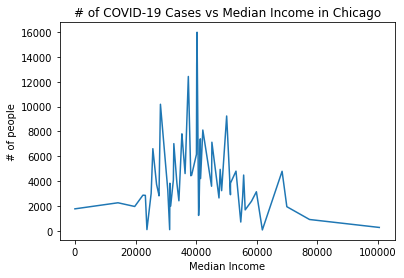

In [251]:
df3["Cases"].plot(ylabel="# of people", title="# of COVID-19 Cases vs Median Income in Chicago")

We can observe in the above graph that there are a greater amount of cases within the middle income brackets of $30000-$60000. As income increases past $50000, the number of cases decreases.

<AxesSubplot:title={'center':'# of COVID-19 Deaths vs Median Income in Chicago'}, xlabel='Median Income', ylabel='# of people'>

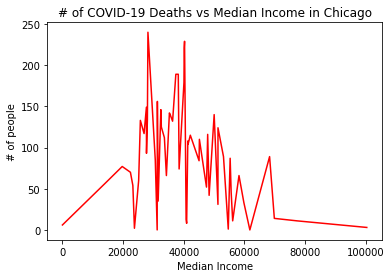

In [253]:
df3["Deaths"].plot(ylabel="# of people", title="# of COVID-19 Deaths vs Median Income in Chicago", color="red")

Again, we can see that the number of deaths generally decreases as the median income increases past $40,000.